Created: 2022-06-14 13:15:07 
version: 4

notes: use pandas dataframe to load files info from xls spreadsheet

### set up environment and functions

Let's import some useful stuff first

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

import librosa
import librosa.display
import IPython.display as ipd

import os

from am_analysis import am_analysis as ama

### Dataframes

#### All files in one dataframe

read xls file with info on all audio files into a database.

In [2]:
# the root directory of the all audio recordings
data_root_dir = '/Users/emmanouela/Documents/animal_behaviour_research/acoustics/mimicry/honeyguides/data/recordings'

In [3]:
#location of xls file
xls_file = '/Users/emmanouela/Documents/animal_behaviour_research/acoustics/mimicry/honeyguides/data/recordings_emmanouela.xlsx'

# read xls in pandas dataframe
df_all = pd.read_excel(xls_file)

#take a look at header and 10 first entries of dataframe
df_all.head(10) 

,file_name,species,individuals,chick stage,type
0,LT07 two barbets 17102009,Black-collared Barbet,2,stage 4,host1_brood
1,LT12 4 barbets 31202009,Black-collared Barbet,4,NaN,host1_brood
2,LT38 four barbets 15112010,Black-collared Barbet,4,stage 4,host1_brood
3,111113_0028,Black-collared Barbet,1,stage 1,host1_single
4,LT35_barbethatchling_05112011a,Black-collared Barbet,1,stage 1,host1_single
5,LT35_barbethatchling_05112011b,Black-collared Barbet,1,stage 1,host1_single
6,LT43_barbethatchlingA_11112011,Black-collared Barbet,1,stage 1,host1_single
7,LT43_barbethatchlingB_11112011a,Black-collared Barbet,1,stage 1,host1_single
8,LT43_barbethatchlingB_11112011b,Black-collared Barbet,1,stage 1,host1_single
9,LT15 honeyguide begging 28102009,Lesser Honeyguide,1,stage 4,parasite1_single


#### Renove spaces from names of original audio files

<div class="mark">
**This step only needs to be done once for each set of recording files; and if necessary only**

We will rename the audio files to remove spaces and replace them with underscores. We can then adjust the file name entries accordingly in the dataframe (xls file remains as is)</div><i class="fa fa-lightbulb-o "></i>

In [ ]:
for file in df_all['file_name']:
    old_name=os.path.join(data_root_dir,df_all.loc[df_all['file_name'] == file, 'type'].item(),file+'.wav')
    new_name=os.path.join(data_root_dir,df_all.loc[df_all['file_name'] == file, 'type'].item(),file.replace(' ', '_')+'.wav')
    #print(old_name)
    #print(new_name)
    if os.path.exists(old_name):    
        os.rename(old_name,new_name)
        print(new_name)

#### Correct filenames in dataframe

__now lets correct the filename entries in the dataframe so that they also do not have spaces and they correspond to the renames files__


In [4]:
df_all['file_name'] = df_all['file_name'].str.replace(' ','_')
df_all.head(10)

,file_name,species,individuals,chick stage,type
0,LT07_two_barbets_17102009,Black-collared Barbet,2,stage 4,host1_brood
1,LT12_4_barbets_31202009,Black-collared Barbet,4,NaN,host1_brood
2,LT38_four_barbets_15112010,Black-collared Barbet,4,stage 4,host1_brood
3,111113_0028,Black-collared Barbet,1,stage 1,host1_single
4,LT35_barbethatchling_05112011a,Black-collared Barbet,1,stage 1,host1_single
5,LT35_barbethatchling_05112011b,Black-collared Barbet,1,stage 1,host1_single
6,LT43_barbethatchlingA_11112011,Black-collared Barbet,1,stage 1,host1_single
7,LT43_barbethatchlingB_11112011a,Black-collared Barbet,1,stage 1,host1_single
8,LT43_barbethatchlingB_11112011b,Black-collared Barbet,1,stage 1,host1_single
9,LT15_honeyguide_begging_28102009,Lesser Honeyguide,1,stage 4,parasite1_single


#### Find duration of each audio file in main dataframe

In [ ]:
for file in df_all['file_name']:
    audio=os.path.join(data_root_dir,df_all.loc[df_all['file_name']==file,'type'].item(),file+'.wav')
    signal,sr=librosa.load(audio)
    print(f'total audio duration of file {file} is : {len(signal)/sr:.2f}s')


#### create separate  dataframes for each type of calls

In [5]:
# let's see how many unique 'types' we have in the main dataframe
print(df_all.type.unique())

['host1_brood' 'host1_single' 'parasite1_single' 'host2_brood'
 'host2_single' 'parasite2_single']


In [6]:
# create one dataframe for each 'type' of calls and check how many files we have in each of the new dataframes

for call_type in df_all.type.unique():
    vars()['df_'+call_type] = df_all[df_all['type']== call_type]
    print('there are {} audio files in the {} category'.format(len(vars()['df_'+call_type]),call_type))

there are 3 audio files in the host1_brood category
there are 6 audio files in the host1_single category
there are 11 audio files in the parasite1_single category
there are 10 audio files in the host2_brood category
there are 17 audio files in the host2_single category
there are 37 audio files in the parasite2_single category


Inspect the dataframes for each call type 

In [153]:
df_host1_brood

,file_name,species,individuals,chick stage,type
0,LT07_two_barbets_17102009,Black-collared Barbet,2,stage 4,host1_brood
1,LT12_4_barbets_31202009,Black-collared Barbet,4,NaN,host1_brood
2,LT38_four_barbets_15112010,Black-collared Barbet,4,stage 4,host1_brood


In [154]:
df_host1_single

,file_name,species,individuals,chick stage,type
3,111113_0028,Black-collared Barbet,1,stage 1,host1_single
4,LT35_barbethatchling_05112011a,Black-collared Barbet,1,stage 1,host1_single
5,LT35_barbethatchling_05112011b,Black-collared Barbet,1,stage 1,host1_single
6,LT43_barbethatchlingA_11112011,Black-collared Barbet,1,stage 1,host1_single
7,LT43_barbethatchlingB_11112011a,Black-collared Barbet,1,stage 1,host1_single
8,LT43_barbethatchlingB_11112011b,Black-collared Barbet,1,stage 1,host1_single


In [155]:
df_parasite1_single

,file_name,species,individuals,chick stage,type
9,LT15_honeyguide_begging_28102009,Lesser Honeyguide,1,stage 4,parasite1_single
10,LT03_honeyguide_begging_26102010,Lesser Honeyguide,1,stage 4,parasite1_single
11,LT11_honeyguide_begging_28102010,Lesser Honeyguide,1,stage 4,parasite1_single
12,LT17_honeyguide_17112010,Lesser Honeyguide,1,stage 4,parasite1_single
13,LT29_honeyguide_begging_05112010,Lesser Honeyguide,1,NaN,parasite1_single
14,111112_0024,Lesser Honeyguide,1,stage 1,parasite1_single
15,111114_0030,Lesser Honeyguide,1,stage 1,parasite1_single
16,LT25_hghatchling_05112011,Lesser Honeyguide,1,stage 1,parasite1_single
17,LT040_hgnestling_06112011,Lesser Honeyguide,1,stage 1,parasite1_single
18,LT40_hgnestlinginnest_11112011,Lesser Honeyguide,1,stage 2,parasite1_single


In [156]:
df_host2_brood

,file_name,species,individuals,chick stage,type
20,MH002_two_hosts_20102009,Little Bee-eater,2,NaN,host2_brood
21,MP096_4_hosts_30102009,Little Bee-eater,4,NaN,host2_brood
22,MP050_four_hosts_09112010,Little Bee-eater,4,stage 4,host2_brood
23,MP059_five_hosts_04112010,Little Bee-eater,5,stage 3,host2_brood
24,MP062_four_hosts_04112010,Little Bee-eater,4,stage 4,host2_brood
25,MH001_host_begging_24102008,Swallow-tailed Bee-eater,4,stage 3,host2_brood
26,MP017_host_begging_20102008,Little Bee-eater,2,stage 1,host2_brood
27,MP017_host_begging_27102008,Little Bee-eater,2,stage 3,host2_brood
28,MP034_host_begging_29102008,Little Bee-eater,2,stage 3,host2_brood
29,MP037_host_begging_31102008,Little Bee-eater,4,stage 3,host2_brood


In [157]:
df_host2_single

,file_name,species,individuals,chick stage,type
30,MP069_1_bee-eater_31102009,Little Bee-eater,1,NaN,host2_single
31,MP069_single_host_24102009,Little Bee-eater,1,NaN,host2_single
32,MP069_single_host_26102009,Little Bee-eater,1,NaN,host2_single
33,MP096_1_hosts_30102009,Little Bee-eater,1,NaN,host2_single
34,MP019_one_host_08112010,Little Bee-eater,1,stage 3,host2_single
35,MP045_one_host_08112010,Little Bee-eater,1,stage 2,host2_single
36,MP048_one_host_08112010,Little Bee-eater,1,stage 2,host2_single
37,MP059_one_host_04112010,Little Bee-eater,1,stage 3,host2_single
38,MP062_one_host_04112010,Little Bee-eater,1,stage 4,host2_single
39,111112_0025,Little Bee-eater,1,stage 1,host2_single


In [158]:
df_parasite2_single

,file_name,species,individuals,chick stage,type
47,MH001_honeyguide_begging_09102009,Greater Honeyguide,1,stage 3,parasite2_single
48,MH001_honeyguide_begging_11102009,Greater Honeyguide,1,stage 3,parasite2_single
49,MH001_honeyguide_begging_13102009,Greater Honeyguide,1,stage 3,parasite2_single
50,MH001_honeyguide_07102009,Greater Honeyguide,1,stage 2,parasite2_single
51,MP004_honeyguide_begging_15102009,Greater Honeyguide,1,stage 1,parasite2_single
52,MP004_honeyguide_begging_17102009,Greater Honeyguide,1,stage 1,parasite2_single
53,MP004_honeyguide_begging_19102009,Greater Honeyguide,1,stage 2,parasite2_single
54,MP004_honeyguide_begging_21102009,Greater Honeyguide,1,stage 2,parasite2_single
55,MP009_honeyguide_04112009,Greater Honeyguide,1,stage 4,parasite2_single
56,MP038_honeyguide_05112009,Greater Honeyguide,1,stage 2,parasite2_single


### Plot audiowaves

<div class="girk">
uncomment line 
    
    ipd.display(ipd.Audio(data=audio,rate=sr)) 
    
if you also want an audio player for each file.
This however is very memory expensive when done for many files. Use with caution!!</div><i class="fa fa-lightbulb-o "></i>

In [159]:
def plot_audiowaves(df,n_waves,start_index,c_map='nipy_spectral'):
    color_map= plt.get_cmap(c_map)
    colors = iter(color_map(np.linspace(0,1,n_waves+1)))
    for file in df['file_name'][start_index:start_index+n_waves]:
        call_type = df.loc[df['file_name']==file,'type'].item()
        stage = df.loc[df['file_name']==file,'chick stage'].item()
        if str(stage)=='nan':
            stage='stage unknown'
        audio=os.path.join(data_root_dir,call_type,file+'.wav')
        signal,sr=librosa.load(audio)
        #ipd.display(ipd.Audio(data=audio,rate=sr))
        plt.figure(figsize=(10,8))
        librosa.display.waveshow(signal, sr=sr,alpha=0.4,color=next(colors))
        plt.title(file + '   ' +  call_type + '    ' + str(stage))
        plt.show()
        print('\n')  
    return    

In [233]:
# host2_brood, 4 x stage-4 chicks
file = df_host2_brood[df_host2_brood.index==24]
filename=file['file_name'].item()
call_type=file['type'].item()
signal,sr_h2b_s4_4=librosa.load(os.path.join(data_root_dir,call_type,filename+'.wav'))
signal_h2b_s4_4 = signal[0:sr_h2b_s4_4*8]

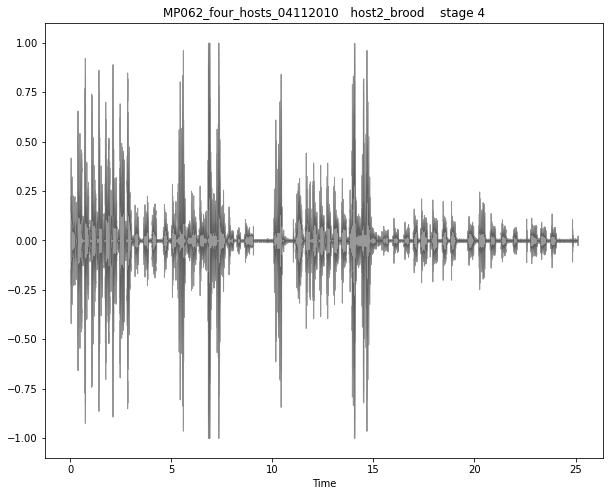

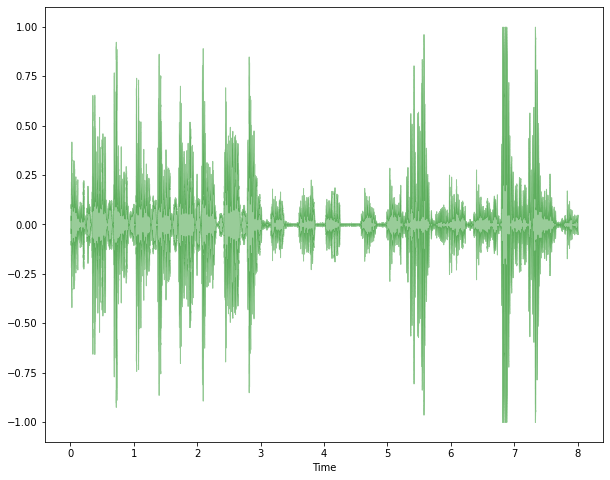

In [234]:
# full audiowave
plot_audiowaves(file,1,0,c_map='nipy_spectral')
# chosen snippet of audiowave
plt.figure(figsize=(10,8))
librosa.display.waveshow(signal_h2b_s4_4,sr=sr_h2b_s4_4,alpha=0.4,color='g')
plt.show()

In [235]:
# host2_single, 1 x stage-4 chicks
file = df_host2_single[df_host2_single.index==38]
filename=file['file_name'].item()
call_type=file['type'].item()
signal,sr_h2s_s4=librosa.load(os.path.join(data_root_dir,call_type,filename+'.wav'))
signal_h2s_s4 = signal[0:sr_h2s_s4*8]

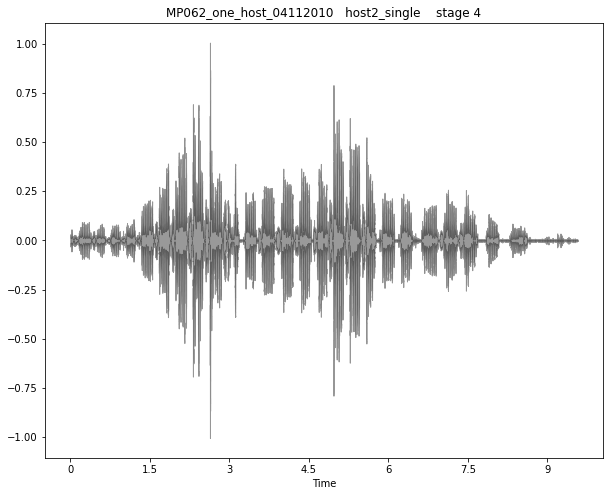

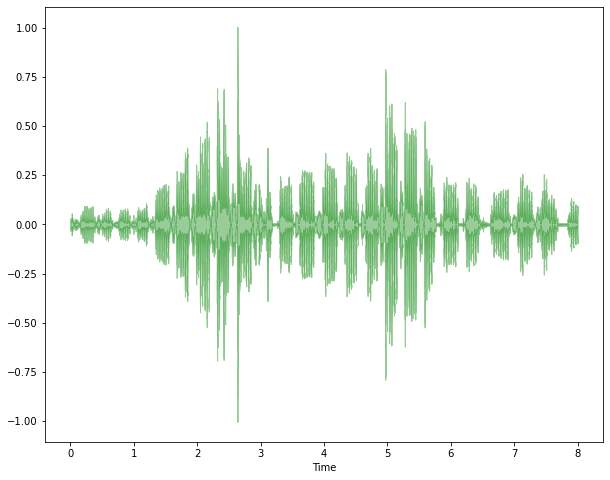

In [236]:
# full audiowave
plot_audiowaves(file,1,0,c_map='nipy_spectral')
# chosen snippet of audiowave
plt.figure(figsize=(10,8))
librosa.display.waveshow(signal_h2s_s4,sr=sr_h2s_s4,alpha=0.4,color='g')
plt.show()

In [237]:
# host2_single, 1 x stage-4 chicks
file = df_parasite2_single[df_parasite2_single.index==78]
filename=file['file_name'].item()
call_type=file['type'].item()
signal,sr_p2s_s4=librosa.load(os.path.join(data_root_dir,call_type,filename+'.wav'))
signal_p2s_s4 = signal[0:sr_p2s_s4*8]

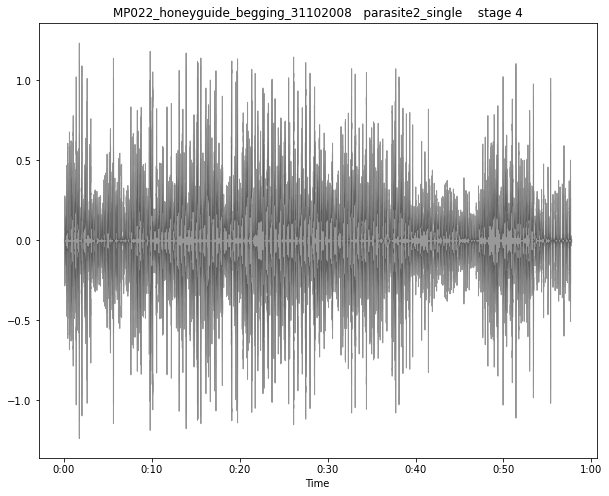

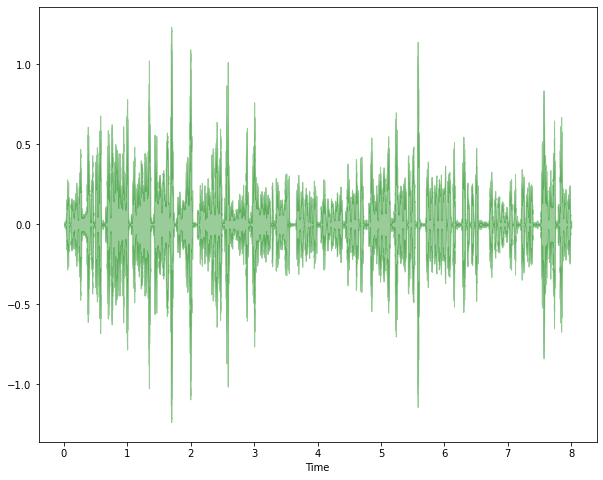

In [238]:
# full audiowave
plot_audiowaves(file,1,0,c_map='nipy_spectral')
# chosen snippet of audiowave
plt.figure(figsize=(10,8))
librosa.display.waveshow(signal_p2s_s4,sr=sr_p2s_s4,alpha=0.4,color='g')
plt.show()

### Spectrograms

In [267]:
def plot_stft(signal,sr, fft_window,hop_size,y_axis='log',colormap='jet'):
    stft=librosa.stft(signal,n_fft=fft_window, hop_length=hop_size)
    spec_power = np.abs(stft)**2
    p_to_db = librosa.power_to_db(spec_power)
    plt.figure(figsize=(18,8))
    img=librosa.display.specshow(p_to_db,sr=sr,hop_length=hop_size,x_axis='time',y_axis=y_axis,cmap=colormap)
    plt.colorbar(img,format="%+2.f dB")
    plt.clim(-70,70)
    plt.show()
    return

In [ ]:
files_to_plot=[signal_h2b_s4_4,signal_h2s_s4,signal_p2s_s4]
sr=sr_h2s_s4

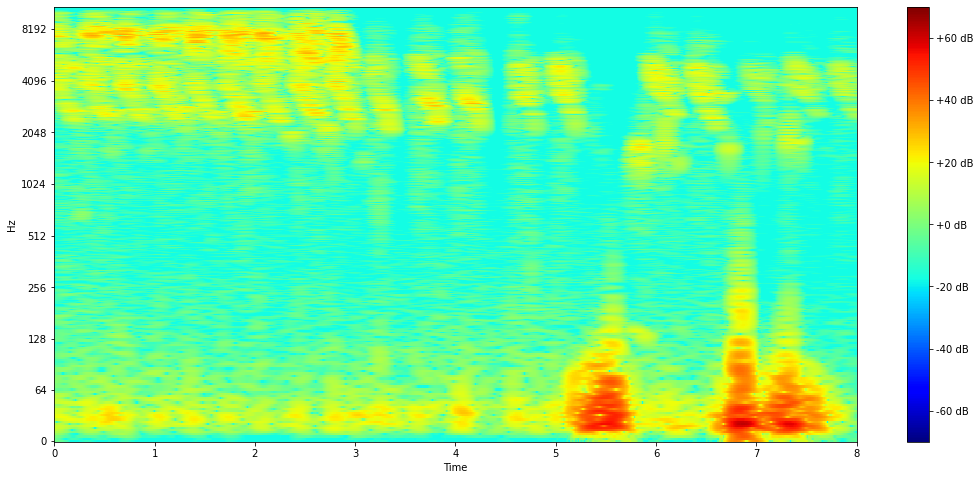

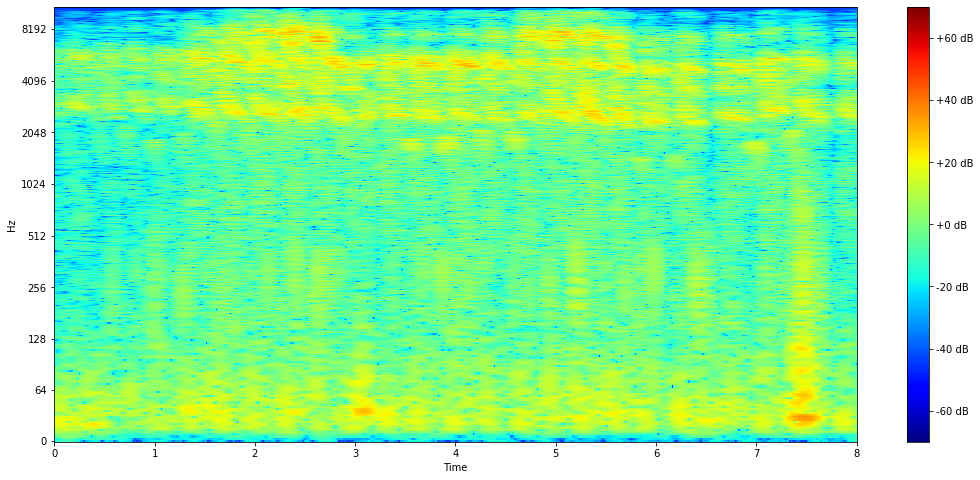

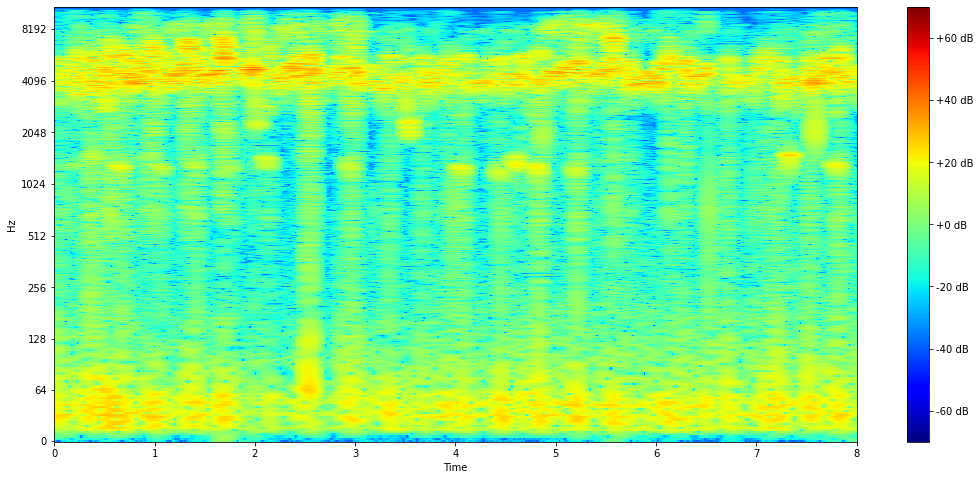

In [269]:
n = len(files_to_plot)
cols = 2
rows = int(np.ceil(n/cols))
n = rows*cols

#fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
for i,signal in enumerate(files_to_plot):
  r = i // cols
  c = i % cols
  #ax = axes[r][c]
  plot_stft(signal/np.max(np.abs(signal)),sr,fft_window=8192,hop_size=256,y_axis='log',colormap='jet')
  
plt.show()

### Modulation spectrogram (STFT)

/Users/emmanouela/opt/anaconda3/lib/python3.9/site-packages/am_analysis/am_analysis.py:1412: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pmesh = plt.pcolormesh(MF, F, X_plot, cmap =c_map)


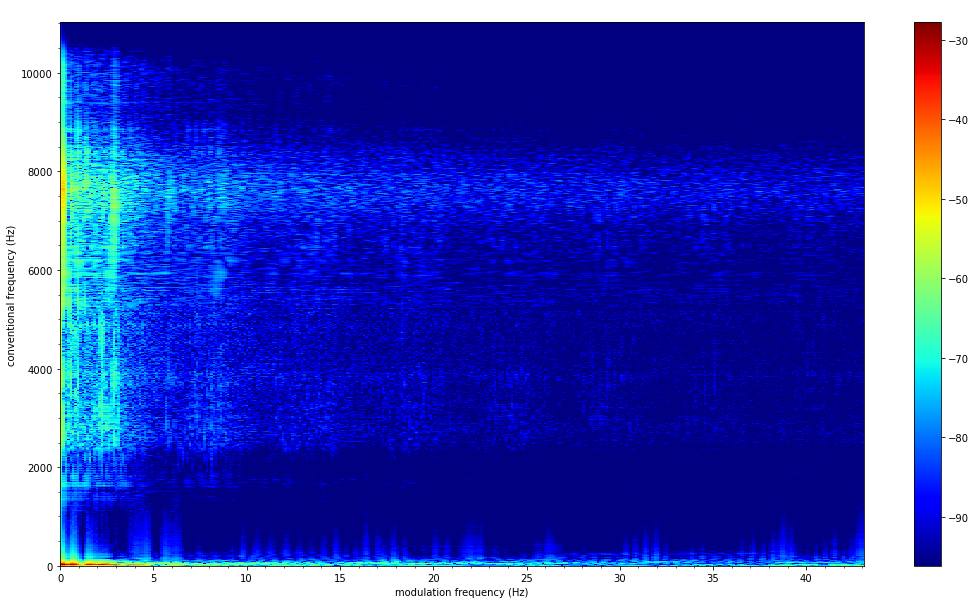

In [242]:
w_size=4096
w_shift=1/16*w_size
rfft_mod = ama.strfft_modulation_spectrogram(signal_h2b_s4_4,sr_h2b_s4_4, w_size, w_shift, channel_names=' ',win_function_y = 'boxcar', win_function_x = 'boxcar')
plt.figure(figsize=(18,10))
ama.plot_modulation_spectrogram_data(rfft_mod,c_map='jet')

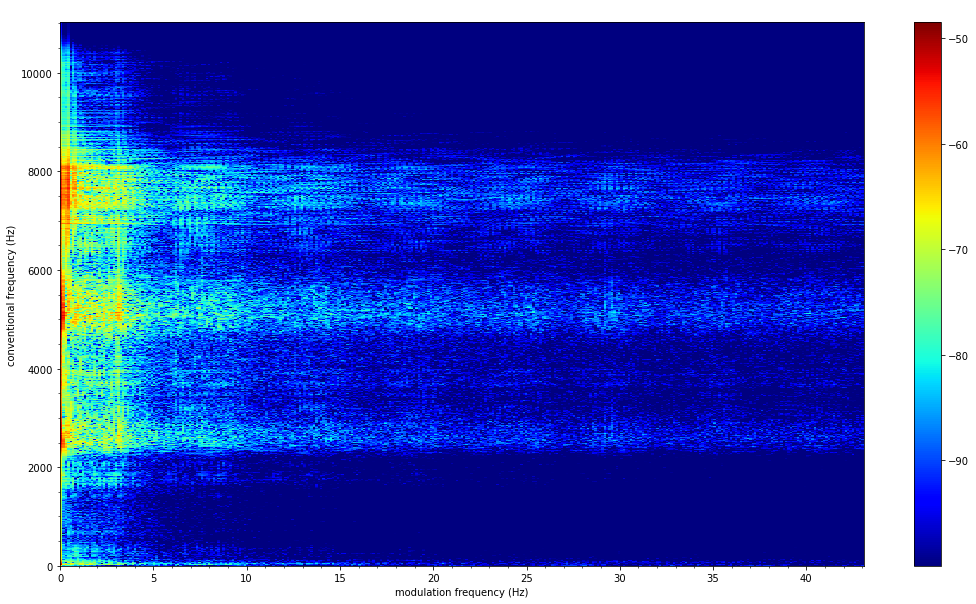

In [243]:
w_size=4096
w_shift=1/16*w_size
rfft_mod = ama.strfft_modulation_spectrogram(signal_h2s_s4,sr_h2s_s4, w_size, w_shift, channel_names=' ',win_function_y = 'boxcar', win_function_x = 'boxcar')
plt.figure(figsize=(18,10))
ama.plot_modulation_spectrogram_data(rfft_mod,c_map='jet')

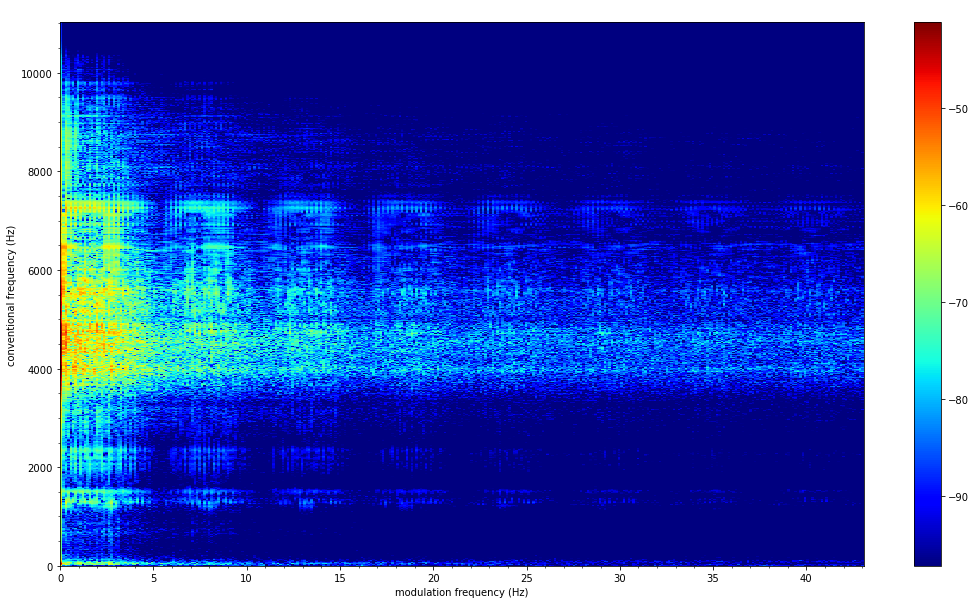

In [244]:
w_size=4096
w_shift=1/16*w_size
rfft_mod = ama.strfft_modulation_spectrogram(signal_p2s_s4,sr_p2s_s4, w_size, w_shift, channel_names=' ',win_function_y = 'boxcar', win_function_x = 'boxcar')
plt.figure(figsize=(18,10))
ama.plot_modulation_spectrogram_data(rfft_mod,c_map='jet')

### Band Energy RAtio

In [274]:
# boundary frequency refers to the frequency we choose to define low and high frequencies.

def band_energy_ratio(signal,sr, boundary_freq=2000,fft_window=1024,hop_size=512):
    stft=librosa.stft(signal,n_fft=fft_window, hop_length=hop_size)# start with fourier transformation of original signal
    spec_power = np.abs(stft)**2                                   # calculate power of the spectrum: P = |fft|^2 
    freq_range = sr/2                                              # frequency range depends on sampling rate of the recording
    n_freq_bins = spec_power.shape[0]                              # number of bins in the frequency dimension
    freq_bin_size = freq_range/n_freq_bins                         # size of each bin in the frequency dimension
    boundary_freq_bin = int(np.floor(boundary_freq/freq_bin_size)) # bin #ID of the boundary frequency
    
    ber = []                                                       # initialise the array where we'll keep the ratio value for each time step
    for frame in spec_power.T:
        high_f = frame[boundary_freq_bin:].sum()
        low_f = frame[:boundary_freq_bin].sum()
        ber.append(low_f/high_f)
    return ber

In [282]:
def ber_plot(signal,sr,boundary_freq,fft_window,hop_size,ylim=1000,color='b'):
    ber = band_energy_ratio(signal,sr, boundary_freq,fft_window=fft_window,hop_size=hop_size)
    t = librosa.frames_to_time(range(len(ber)),hop_length=hop_size)
    #plt.figure(figsize=(22,10))
    plt.plot(t,ber,c=color)
    #plt.ylim((0, ylim))
    #plt.show()
    return

In [307]:
## CHOOSE PARAMETER VALUES
boundary_freq = 4000
fft_window = 2048
hop_size = 512

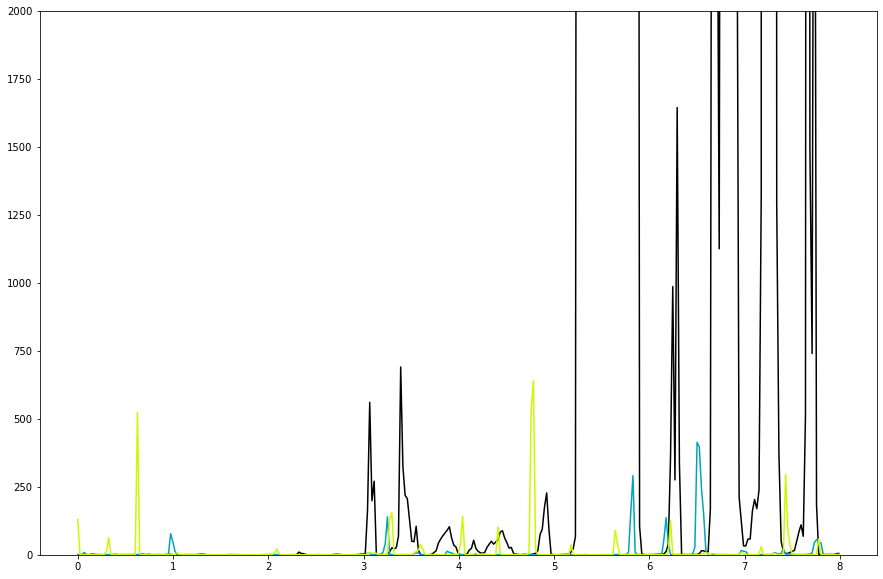

In [314]:
color_map= plt.get_cmap('nipy_spectral')
colors = iter(color_map(np.linspace(0,1,len(files_to_plot)+1)))
plt.figure(figsize=(15,10))

for signal in files_to_plot:
    ber_plot(signal,sr,boundary_freq,fft_window,hop_size,color=next(colors))
plt.ylim((0, 2000))
plt.show()